<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Regresion%20lineal/SRT%20v2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v2.1 - Ensayo
### Regresion lineal - Datos reales | Nuevo Dataset

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv

--2023-05-06 23:19:49--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/serie_acc_SRT.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26984867 (26M) [text/plain]
Saving to: ‘serie_acc_SRT.csv’

serie_acc_SRT.csv   100%[===================>]  25.73M   164MB/s    in 0.2s    

2023-05-06 23:19:50 (164 MB/s) - ‘serie_acc_SRT.csv’ saved [26984867/26984867]



In [3]:
df = pd.read_csv('/content/serie_acc_SRT.csv', header=0, sep=';',
                 names=['año','mes','codigo','total_cp'],
                 dtype={'año': str, 'mes': str, 'codigo': str, 'total_cp': str})

In [4]:
column_order = ['codigo', 'año', 'mes', 'total_cp']
new_df = df.reindex(columns=column_order)
df = new_df.copy()

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470278 entries, 0 to 1470277
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   codigo    1469958 non-null  object
 1   año       1470278 non-null  object
 2   mes       1470278 non-null  object
 3   total_cp  1470278 non-null  object
dtypes: object(4)
memory usage: 44.9+ MB


#### Ajustamos tipo de datos

In [6]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [7]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [8]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [9]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [10]:
df.head()

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1


### Eliminamos NaN

In [11]:
df = df.dropna(subset=['codigo'])
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


In [12]:
df = df.sort_values(['año','mes'], ascending=True)
df

,codigo,año,mes,total_cp
0,01657000,1995,1,1
1,08300000,1995,7,1
2,01900000,1995,9,1
3,01900000,1995,11,1
4,01650000,1996,3,1
...,...,...,...,...
1470273,05582000,2023,5,1
1470274,01754000,2023,5,7
1470275,03503000,2023,5,3
1470276,X5000FJA,2023,5,1


### Convertimos el codigo postal a 4 caracteres

In [13]:
df.codigo = df['codigo'].str.slice(start=1, stop=5)
df

,codigo,año,mes,total_cp
0,1657,1995,1,1
1,8300,1995,7,1
2,1900,1995,9,1
3,1900,1995,11,1
4,1650,1996,3,1
...,...,...,...,...
1470273,5582,2023,5,1
1470274,1754,2023,5,7
1470275,3503,2023,5,3
1470276,5000,2023,5,1


#### Verificamos cantidad de registros por codigo

In [14]:
# codigos unicos
contador = df['codigo'].value_counts()
contador

5000    21916
2000    18100
4000    13459
5500    12482
1425    12020
        ...  
4361        1
6412        1
4677        1
5884        1
3033        1
Name: codigo, Length: 3355, dtype: int64

### Conservamos al menos 12 meses por codigo

In [15]:
mayores_a_12_datos = contador[contador > 12]

In [16]:
len(mayores_a_12_datos)

2610

In [17]:
df = df[df['codigo'].isin(mayores_a_12_datos.index)]
df

,codigo,año,mes,total_cp
0,1657,1995,1,1
1,8300,1995,7,1
2,1900,1995,9,1
3,1900,1995,11,1
4,1650,1996,3,1
...,...,...,...,...
1470273,5582,2023,5,1
1470274,1754,2023,5,7
1470275,3503,2023,5,3
1470276,5000,2023,5,1


### Eliminamos códigos no válidos

In [39]:
df = df.loc[df.codigo != "    "]

In [40]:
df = df.loc[df.codigo != "   0"]

In [41]:
df = df.loc[df.codigo != "0000"]

In [51]:
df = df.loc[df.codigo != "0001"]

In [52]:
df = df.loc[df.codigo != "0005"]

### Transformacion

#### LabelEncoder

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [55]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [56]:
X_encoded.shape

(1466626,)

In [57]:
pd.DataFrame(X_encoded)

,0
0,442
1,2449
2,618
3,618
4,438
...,...
1466621,1854
1466622,507
1466623,1249
1466624,1581


#### Embeddings

In [58]:
tamano_embedding = 50

In [59]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [60]:
matriz_embedding

array([[0.30133129, 0.207159  , 0.59245441, ..., 0.80097397, 0.09570737,
        0.97177127],
       [0.96379063, 0.8874263 , 0.96065559, ..., 0.24379633, 0.66059822,
        0.90354566],
       [0.46156068, 0.73790923, 0.71377975, ..., 0.68898079, 0.8432167 ,
        0.45769789],
       ...,
       [0.21166123, 0.84088808, 0.10407506, ..., 0.94531212, 0.50313731,
        0.06204296],
       [0.13507747, 0.59333287, 0.06297446, ..., 0.09249421, 0.91499969,
        0.96245865],
       [0.22675829, 0.13683957, 0.76846403, ..., 0.23425073, 0.94693829,
        0.98165083]])

In [61]:
encoder.classes_

array(['1000', '1001', '1002', ..., '9412', '9420', '9999'], dtype=object)

In [62]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [63]:
atributos_embeddings.shape

(1466626, 50)

#### Verificacion embeddings

In [64]:
i = 0
encoder.classes_[i]

'1000'

In [65]:
matriz_embedding[i]

array([0.30133129, 0.207159  , 0.59245441, 0.56763272, 0.57043106,
       0.14036143, 0.40551144, 0.47724991, 0.7530224 , 0.83691884,
       0.6075735 , 0.18364479, 0.15031862, 0.5098843 , 0.79887558,
       0.71591237, 0.90690929, 0.66293714, 0.81035779, 0.09923223,
       0.17576931, 0.59411519, 0.49880611, 0.44601797, 0.03606955,
       0.03612777, 0.36646651, 0.72909848, 0.41076975, 0.45720637,
       0.3663082 , 0.56791791, 0.58513439, 0.56589603, 0.55774425,
       0.33191915, 0.71674058, 0.16668033, 0.85444495, 0.91637443,
       0.95309646, 0.36354413, 0.90638975, 0.04138265, 0.51073155,
       0.25595835, 0.91681923, 0.80097397, 0.09570737, 0.97177127])

In [66]:
matriz_embedding.shape

(2605, 50)

#### Dataframe con datos de embeddings

In [67]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [68]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
0,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.953096,0.363544,0.906390,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771
1,0.963791,0.887426,0.960656,0.512994,0.081684,0.922167,0.449307,0.835889,0.946168,0.427445,...,0.663491,0.712679,0.067232,0.366253,0.067757,0.380245,0.674580,0.243796,0.660598,0.903546
2,0.461561,0.737909,0.713780,0.525548,0.876008,0.290744,0.698553,0.615487,0.475220,0.746820,...,0.620769,0.157665,0.598461,0.346079,0.296909,0.485838,0.030325,0.688981,0.843217,0.457698
3,0.632383,0.621738,0.044059,0.997876,0.988546,0.954887,0.706231,0.631104,0.846153,0.223930,...,0.300833,0.662317,0.263289,0.969609,0.853313,0.689767,0.743252,0.439502,0.625210,0.174995
4,0.206500,0.430402,0.438943,0.518611,0.796628,0.330651,0.332738,0.728834,0.212833,0.022157,...,0.160639,0.532817,0.810838,0.378833,0.745771,0.117306,0.665244,0.460002,0.160429,0.481848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,0.398862,0.006153,0.054369,0.278648,0.710436,0.455733,0.802203,0.011423,0.971482,0.577309,...,0.062721,0.629890,0.742209,0.147658,0.306662,0.345878,0.256297,0.382266,0.745467,0.354759
2601,0.455163,0.889365,0.419041,0.566790,0.111933,0.236729,0.851751,0.474381,0.444184,0.582734,...,0.157428,0.984620,0.876041,0.406411,0.077329,0.070227,0.629362,0.668753,0.854978,0.570798
2602,0.211661,0.840888,0.104075,0.329669,0.227416,0.242022,0.921339,0.435232,0.314459,0.387849,...,0.207751,0.711680,0.846930,0.798384,0.811781,0.494645,0.733730,0.945312,0.503137,0.062043
2603,0.135077,0.593333,0.062974,0.593458,0.903706,0.870404,0.450334,0.859158,0.112941,0.286304,...,0.616952,0.792778,0.049764,0.267082,0.383934,0.183704,0.532103,0.092494,0.915000,0.962459


In [69]:
embedding_df['codigo'] = encoder.classes_

In [70]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_40,emb_41,emb_42,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49
codigo,,,,,,,,,,,,,,,,,,,,,
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.953096,0.363544,0.906390,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771
1001,0.963791,0.887426,0.960656,0.512994,0.081684,0.922167,0.449307,0.835889,0.946168,0.427445,...,0.663491,0.712679,0.067232,0.366253,0.067757,0.380245,0.674580,0.243796,0.660598,0.903546
1002,0.461561,0.737909,0.713780,0.525548,0.876008,0.290744,0.698553,0.615487,0.475220,0.746820,...,0.620769,0.157665,0.598461,0.346079,0.296909,0.485838,0.030325,0.688981,0.843217,0.457698
1003,0.632383,0.621738,0.044059,0.997876,0.988546,0.954887,0.706231,0.631104,0.846153,0.223930,...,0.300833,0.662317,0.263289,0.969609,0.853313,0.689767,0.743252,0.439502,0.625210,0.174995
1004,0.206500,0.430402,0.438943,0.518611,0.796628,0.330651,0.332738,0.728834,0.212833,0.022157,...,0.160639,0.532817,0.810838,0.378833,0.745771,0.117306,0.665244,0.460002,0.160429,0.481848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,0.398862,0.006153,0.054369,0.278648,0.710436,0.455733,0.802203,0.011423,0.971482,0.577309,...,0.062721,0.629890,0.742209,0.147658,0.306662,0.345878,0.256297,0.382266,0.745467,0.354759
9410,0.455163,0.889365,0.419041,0.566790,0.111933,0.236729,0.851751,0.474381,0.444184,0.582734,...,0.157428,0.984620,0.876041,0.406411,0.077329,0.070227,0.629362,0.668753,0.854978,0.570798
9412,0.211661,0.840888,0.104075,0.329669,0.227416,0.242022,0.921339,0.435232,0.314459,0.387849,...,0.207751,0.711680,0.846930,0.798384,0.811781,0.494645,0.733730,0.945312,0.503137,0.062043


In [71]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
1657,1995,1,1
8300,1995,7,1
1900,1995,9,1
1900,1995,11,1
1650,1996,3,1
...,...,...,...
5582,2023,5,1
1754,2023,5,7
3503,2023,5,3


In [72]:
df.total_cp.max()

5313

#### Transformar la variable de salida

In [73]:
mmscaler = MinMaxScaler()

In [74]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [75]:
df.head()

,año,mes,total_cp
codigo,,,
1657,1995,1,0.0
8300,1995,7,0.0
1900,1995,9,0.0
1900,1995,11,0.0
1650,1996,3,0.0


#### Joins de Dataframes

In [76]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
codigo,,,,,,,,,,,,,,,,,,,,,
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1996,12,0.000000
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1997,10,0.000188
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1997,11,0.000000
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1998,2,0.000941
1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,0.836919,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1998,9,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,0.425971,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,7,0.000188
9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,0.425971,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,8,0.000188
9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,0.425971,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,9,0.000188


#### Datos de entrenamiento

In [77]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
0,1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1996,12,0.000000
1,1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1997,10,0.000188
2,1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1997,11,0.000000
3,1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1998,2,0.000941
4,1000,0.301331,0.207159,0.592454,0.567633,0.570431,0.140361,0.405511,0.477250,0.753022,...,0.041383,0.510732,0.255958,0.916819,0.800974,0.095707,0.971771,1998,9,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466621,9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,7,0.000188
1466622,9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,8,0.000188
1466623,9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,9,0.000188
1466624,9999,0.226758,0.136840,0.768464,0.902384,0.566997,0.799298,0.047317,0.220543,0.333835,...,0.154378,0.067089,0.955043,0.763931,0.234251,0.946938,0.981651,2013,12,0.000000


In [78]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [79]:
X_data.shape

(1466626, 52)

In [80]:
y_data = df_final['total_cp'].to_numpy()

In [81]:
y_data

array([0.        , 0.00018825, 0.        , ..., 0.00018825, 0.        ,
       0.        ])

In [82]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [83]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Validacion

In [84]:
pred_train = modelo.predict(X_train)
pred_test = modelo.predict(X_test)

In [85]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test  = mean_squared_error(y_test, pred_test)

In [86]:
mse_train, mse_test

(6.54541702583334e-05, 6.76391819658231e-05)

In [87]:
rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)
print('RMSE:', round(rmse_train,4), round(rmse_test,4))

RMSE: 0.0081 0.0082


In [88]:
score = r2_score(y_test, pred_test)
print(f'R2 score: {score:.5f}')

R2 score: 0.00253


No es un buen resultado

### Prediccion

In [107]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [108]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [109]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [110]:
atributos_in = atributos_in.reshape(1, 52)

In [111]:
pred = modelo.predict(atributos_in)

In [112]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [113]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 5187 Año 2023 Mes 6: 6.86 incidentes


### Verificacion grafica

In [114]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_43,emb_44,emb_45,emb_46,emb_47,emb_48,emb_49,año,mes,total_cp
1079366,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2003,3,0.000000
1079367,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2010,1,0.000188
1079368,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2010,3,0.000188
1079369,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2010,5,0.000000
1079370,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2010,6,0.000188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079511,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2022,12,0.000753
1079512,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2023,1,0.000188
1079513,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2023,2,0.001130
1079514,5187,0.831302,0.536049,0.529517,0.484221,0.445975,0.21822,0.67186,0.67202,0.352138,...,0.770943,0.284344,0.597678,0.186378,0.051046,0.720406,0.194515,2023,3,0.000377


In [115]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [116]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])

In [117]:
fechas[0]

'2003-3-01'

In [118]:
totales = mmscaler.inverse_transform([totales])

In [119]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

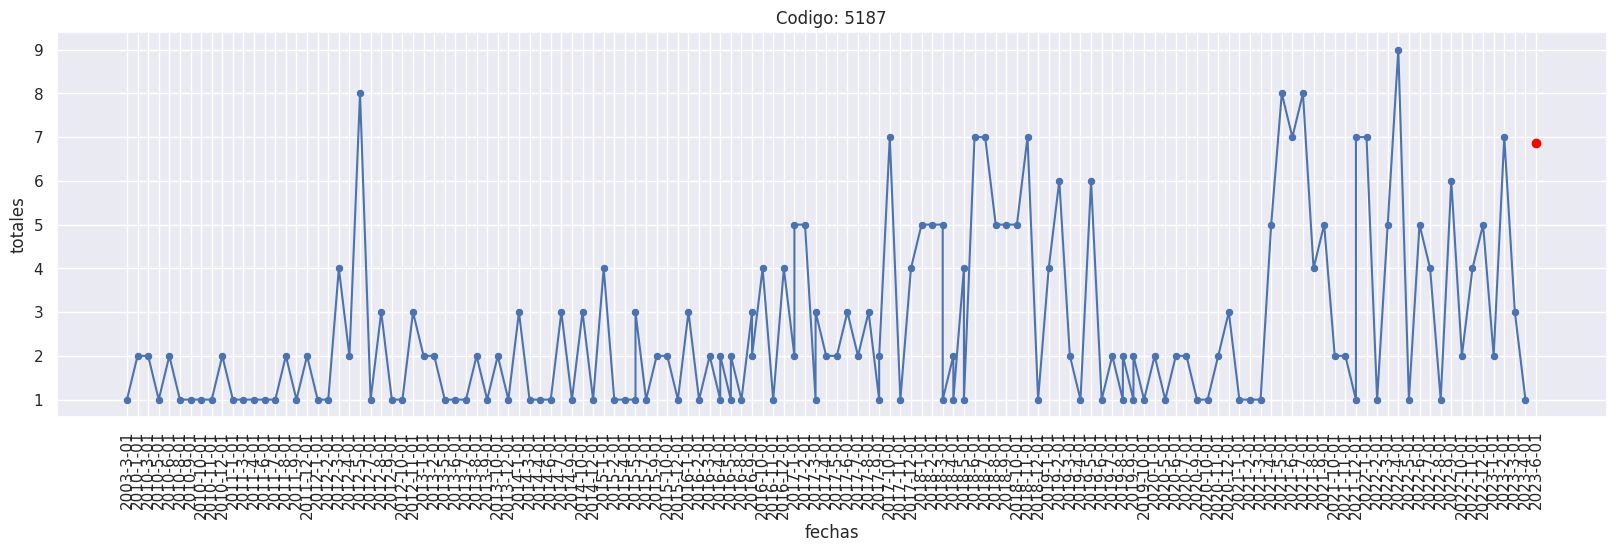

In [120]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()

### Funcion de prediccion

In [133]:
def estimador(codigo=0, anio_in=2023, mes_in=6):
  
  if codigo == 0:
    # Genera codigo aleatorio
    codigo_in = random.choice(encoder.classes_) 
    new_codigo_in = encoder.transform([codigo_in])
    new_codigo_embedding = matriz_embedding[new_codigo_in]
  
  atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)
  atributos_in = atributos_in.reshape(1, 52)
  pred = modelo.predict(atributos_in)
  pred = mmscaler.inverse_transform(pred.reshape(-1, 1))
  print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  
  filtro = df_final['codigo'] == codigo_in
  df_filtrado = df_final[filtro]
  df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)
  
  fechas = []
  totales = []
  for row in df_filtrado.iterrows():
    fechas.append(str(row[1][51])+'-'+str(row[1][52])+'-01')
    totales.append(row[1][53])
  totales = mmscaler.inverse_transform([totales])
  df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

  plt.figure(figsize=(20, 5))
  sns.set(color_codes=True)
  plt.xticks(rotation=90)
  sns.scatterplot(x='fechas', y='totales', data=df_graf)
  plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
  plt.plot(df_graf.fechas, df_graf.totales)
  plt.title("Codigo: "+codigo_in)
  plt.show()

  return

Prediccion para el código 1272 Año 2022 Mes 6: 5.16 incidentes


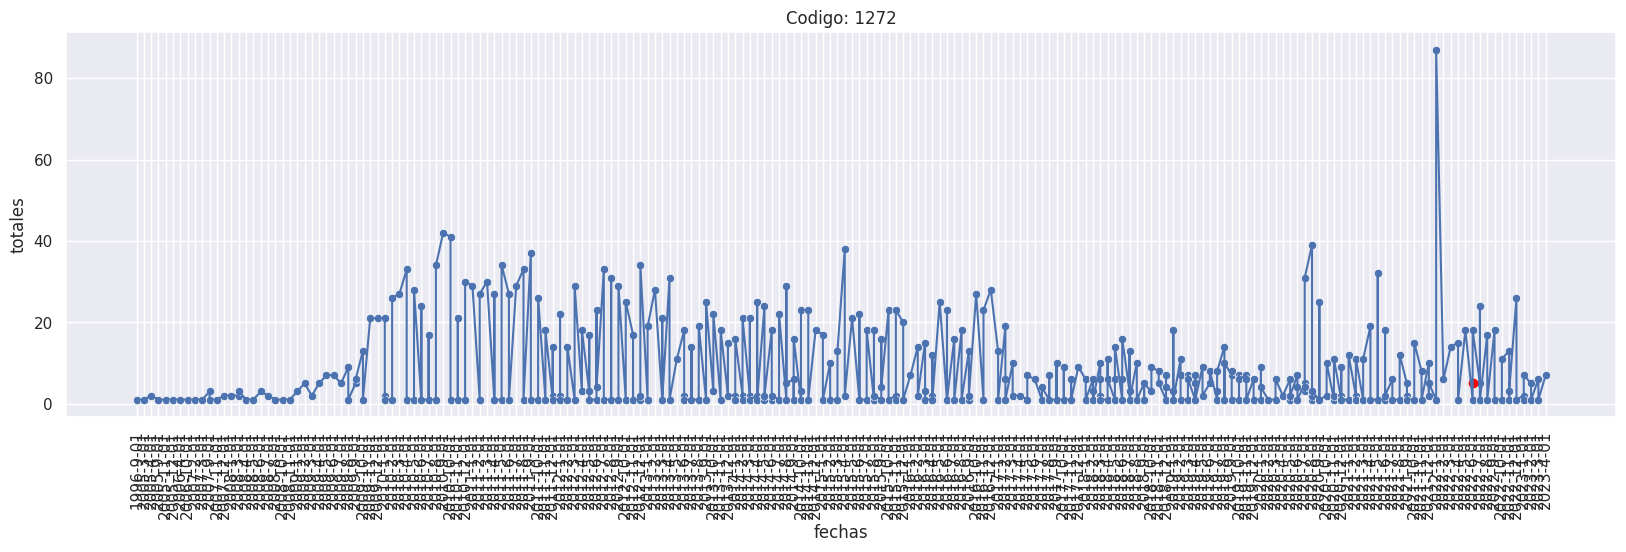

In [147]:
estimador(0,2022)